
# Optimize the Loan eligibility process

___

## Predict Loan Eligibility for Dream Housing Finance company

*Dream Housing Finance* company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are *Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others*. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Data Dictionary

___

***Loan_ID***	- Unique Loan ID  
***Gender*** - Male/ Female  
***Married*** - Applicant married (Y/N)  
***Dependents*** - Number of dependents  
***Education*** - Applicant Education (Graduate/ Under Graduate)  
***Self_Employed*** - Self employed (Y/N)  
***ApplicantIncome*** - Applicant income  
***CoapplicantIncome*** - Coapplicant income  
***LoanAmount*** - Loan amount in thousands  
***Loan_Amount_Term*** - Term of loan in months  
***Credit_History*** - credit history meets guidelines  
***Property_Area*** - Urban/ Semi Urban/ Rural  
***Loan_Status*** - (Target) Loan approved (Y/N)  

>  **Train file**: CSV containing the customers for whom loan eligibility is known as *'Loan_Status'*  
>  **Test file**: CSV containing the customer information for whom loan eligibility is to be predicted

# Submission file format

___

**Loan_ID** - Unique Loan ID  
**Loan_Status** - (Target) Loan approved (Y/N)

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [136]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [137]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [138]:
# Droping Loan_ID column because it is not required for training 
train_df = train_df.drop("Loan_ID", axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [139]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [141]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [142]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [144]:
object_cols = ["Gender","Married","Dependents", "Self_Employed", "Property_Area"]
num_cols = ["ApplicantIncome","CoapplicantIncome", "LoanAmount","Loan_Amount_Term","Credit_History"]

train_df[object_cols] = train_df[object_cols].fillna(train_df[object_cols].mode().iloc[0])
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

test_df[object_cols] = test_df[object_cols].fillna(test_df[object_cols].mode().iloc[0])
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

In [145]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [146]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [147]:
print("Row duplicates in train: {} and test: {}".format(train_df.duplicated().sum(),test_df.duplicated().sum()))
# train_df[train_df.duplicated()]
# test_df[test_df.duplicated()]

Row duplicates in train: 0 and test: 0


In [148]:
print("Column duplicates in train: {} and test: {}".format(train_df.columns.duplicated().sum(),test_df.columns.duplicated().sum()))

Column duplicates in train: 0 and test: 0


0      8
1      8
2      8
3      8
4      8
      ..
609    8
610    5
611    8
612    8
613    8
Name: Loan_Amount_Term, Length: 614, dtype: int64


In [150]:
label_encoding = LabelEncoder()
label_cols = ["Gender","Married","Education","Self_Employed", "Loan_Amount_Term"]
for col in label_cols:
    train_df[col] = label_encoding.fit_transform(train_df[col])
    test_df[col] = label_encoding.fit_transform(test_df[col])

prop_area_order = ['Rural', 'Semiurban','Urban']
depend_order = ['0', '1', '2', '3+']
loan_order = ['N','Y']
ordinal_cols = ["Dependents","Property_Area"]

prop_area_encoding = OrdinalEncoder(categories=[prop_area_order])
depend_encoding = OrdinalEncoder(categories=[depend_order])
loan_encoding = OrdinalEncoder(categories=[loan_order])

train_df["Property_Area"] = prop_area_encoding.fit_transform(train_df[["Property_Area"]])
train_df["Dependents"] = depend_encoding.fit_transform(train_df[["Dependents"]])
train_df["Loan_Status"] = loan_encoding.fit_transform(train_df[["Loan_Status"]])

test_df["Property_Area"] = prop_area_encoding.fit_transform(test_df[["Property_Area"]])
test_df["Dependents"] = depend_encoding.fit_transform(test_df[["Dependents"]])

<Axes: >

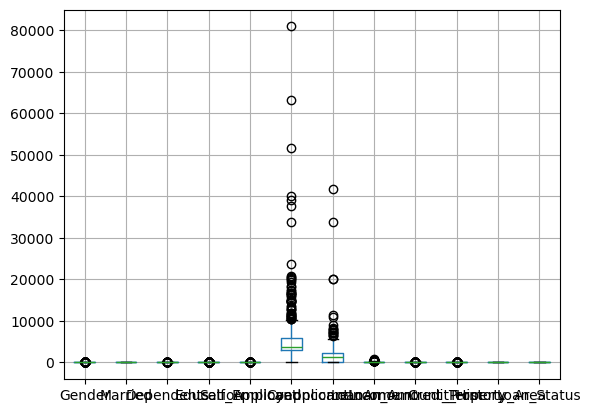

In [151]:
# Not removing outliers from the income, loan amount, term and credit history columns because it is subjective to eery individual
train_df.boxplot() 

<Axes: >

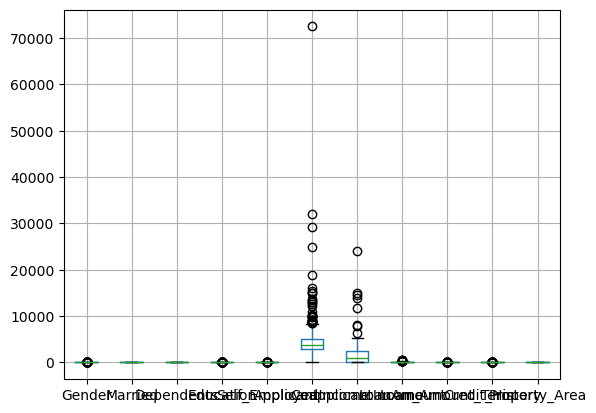

In [152]:
test_df.boxplot()

In [173]:
if(train_df.equals(train_df.astype('int'))):
        train_df = train_df.astype('int')

# for col in test_df.columns:
#     if(col!="Loan_ID" and test_df[~["Loan_ID"]].equals(test_df[col].astype('int'))):
#         test_df[col] = test_df[col].astype('int')

In [174]:
train_df["Property_Area"].dtype

dtype('float64')

In [175]:
test_df[test_df.columns!="Loan_ID"]

ValueError: Item wrong length 12 instead of 367.